In [53]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
from skimage.feature import hog
from skimage import data, exposure
import cv2 as cv

In [3]:
from lib.loader import Loader

In [57]:
X, y = Loader().load_data()

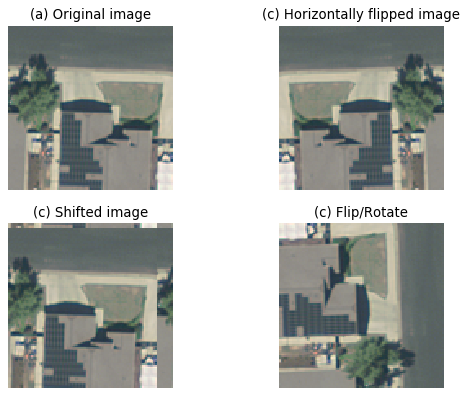

In [30]:
### Image augmentation
figure, axes = plt.subplots(2,2, figsize=(8, 6), dpi=80,)

axes[0][0].imshow(X[2])
axes[0][0].axis('off')
axes[0][0].set_title("(a) Original image")


axes[0][1].imshow(np.fliplr(X[2]))
axes[0][1].axis('off')
axes[0][1].set_title("(a) Horizontally flipped image")


axes[0][1].imshow(np.fliplr(X[2]))
axes[0][1].axis('off')
axes[0][1].set_title("(c) Horizontally flipped image")



transform = AffineTransform(translation=(-1000,300))
wrap_image = warp(X[2],transform, mode="wrap")

axes[1][0].imshow(wrap_image)
axes[1][0].axis('off')
axes[1][0].set_title("(c) Shifted image")



r_image = np.fliplr(rotate(X[2], angle=90))
axes[1][1].imshow(r_image)
axes[1][1].axis('off')
axes[1][1].set_title("(c) Flip/Rotate")

plt.show()

In [51]:
fd, hog_image = hog(X[2], orientations=8, pixels_per_cell=(4, 4),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

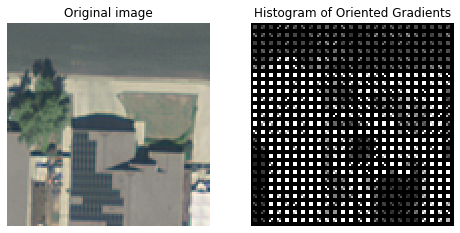

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(X[2], cmap=plt.cm.gray)
ax1.set_title('Original image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [55]:

gray = cv.cvtColor(X[2],cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,X[2])

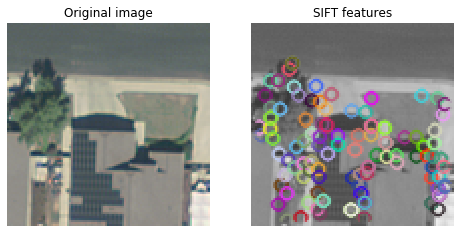

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(X[2], cmap=plt.cm.gray)
ax1.set_title('Original image')

ax2.axis('off')
ax2.imshow(img, cmap=plt.cm.gray)
ax2.set_title('SIFT features')
plt.show()